In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
data = np.load('results_hyper.npz')

colors = ['#000000', '#F0E442', '#CC79A7', '#D55E00', '#56B4E9', '#0072B2','#E69F00']

mp = data['model_parameters']

In [27]:
print('(p_abs, env, trainitr, run, (sigma, v))')
mp.shape

(p_abs, env, trainitr, run, (sigma, v))


(5, 10, 10, 20, 2)

In [28]:
np.mean(mp, axis=(1,2,3))

array([[ 0.30064906, 55.99941207],
       [ 0.28986043, 56.20594013],
       [ 0.30740748, 56.1034959 ],
       [ 0.36511524, 60.53573974],
       [ 0.50510659, 58.16472546]])

[0.11425848 0.31007914 0.83021495 0.24007021 0.6202042  0.90770429
 0.86897085 0.64056144 0.56036906 0.44747101]
[0.08570566 0.13412119 0.53756933 0.84909691 0.14557085 0.32225222
 0.47186614 0.97988719 0.80834282 0.50646698]
[0.13824941 0.09708793 0.56149195 0.80456627 0.68245899 0.22017244
 0.38934151 0.7289326  1.03095641 0.35002206]
[0.18521773 0.16122143 0.20232429 0.31104867 0.82052294 0.35738711
 0.5673754  0.32481925 0.52459196 1.27802798]
[1.34522966 0.13375501 0.40603449 0.57830116 1.0302489  0.80670372
 1.02740829 0.64254324 0.56544396 0.70436613]
[37.77142192 31.67245757 34.67918662 39.96622305 41.07932229 35.65000661
 43.26558107 32.12334697 39.03724499 41.0908269 ]
[24.37204434 39.36341907 39.16889378 39.2803595  40.32494309 36.18303494
 37.96381326 36.49239183 41.12622889 31.9831474 ]
[29.91572713 37.90881142 35.07941972 37.95037698 35.06153176 39.06338435
 39.94845285 38.21715712 39.8913417  40.81817556]
[46.26805188 36.77618282 35.30584625 37.23701455 39.54194265 42.13

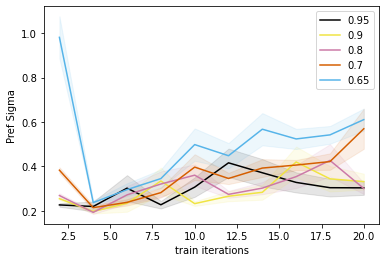

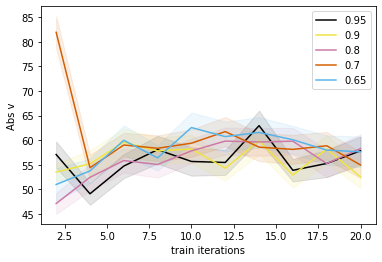

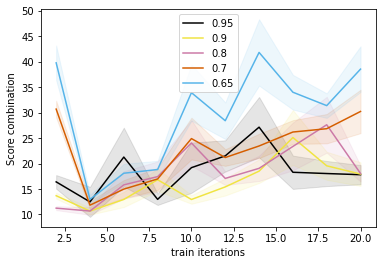

In [158]:

ax = plt.gca()
x = np.arange(2,21,2)
var_i = 0
for p_abs_i in range(5):
    std_dev = np.std(mp[p_abs_i,:,:,:,var_i], axis=(0,2))
    m = np.mean(mp[p_abs_i,:,:,:,var_i], axis=(0,2))
    print(std_dev)
    ax.fill_between(x, \
                    m - (std_dev / np.sqrt(mp.shape[1] * mp.shape[3])), \
                    m + (std_dev / np.sqrt(mp.shape[1] * mp.shape[3])), \
                    #m - std_dev,
                    #m + std_dev,
                    color=colors[p_abs_i], \
                    alpha=0.1, \
                    label='_nolegend_')
    plt.plot(x, m, color=colors[p_abs_i])

plt.xlabel('train iterations')
plt.ylabel('Pref Sigma')
plt.legend(['0.95', '0.9', '0.8', '0.7', '0.65'])



plt.figure()
ax = plt.gca()
var_i = 1
for p_abs_i in range(5):
    std_dev = np.std(mp[p_abs_i,:,:,:,var_i], axis=(0,2))
    m = np.mean(mp[p_abs_i,:,:,:,var_i], axis=(0,2))
    print(std_dev)
    ax.fill_between(x, \
                    m - (std_dev / np.sqrt(mp.shape[1] * mp.shape[3])), \
                    m + (std_dev / np.sqrt(mp.shape[1] * mp.shape[3])), \
                    color=colors[p_abs_i], \
                    alpha=0.1, \
                    label='_nolegend_')
    plt.plot(x, m, color=colors[p_abs_i])

plt.xlabel('train iterations')
plt.ylabel('Abs v')
plt.legend(['0.95', '0.9', '0.8', '0.7', '0.65'])


plt.figure()
ax = plt.gca()
for p_abs_i in range(5):
    score = mp[:,:,:,:, 1] * mp[:,:,:,:, 0]
    
    std_dev = np.std(score[p_abs_i,:,:,:], axis=(0,2))
    m = np.mean(score[p_abs_i,:,:,:], axis=(0,2))
    print(std_dev)
    ax.fill_between(x, \
                    m - (std_dev / np.sqrt(mp.shape[1] * mp.shape[3])), \
                    m + (std_dev / np.sqrt(mp.shape[1] * mp.shape[3])), \
                    color=colors[p_abs_i], \
                    alpha=0.1, \
                    label='_nolegend_')
    plt.plot(x, m, color=colors[p_abs_i])

plt.xlabel('train iterations')
plt.ylabel('Score combination')
plt.legend(['0.95', '0.9', '0.8', '0.7', '0.65'])

plt.show()

validation_accuracy = [0. 0. 0. 0. 0.]


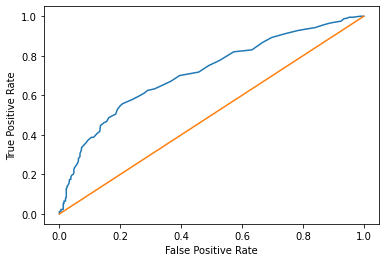

In [174]:
#valid_set = [0,2,4,6,8,9]
test_set = [1,3,5,7]
valid_set = [0,1,2,3,4,5,6,7,8,9]

valid = mp[:,valid_set,:,:,:]
test = mp[:, test_set,:,:,:]

threshold = 0.26

train_itr = 9

thresholds = np.arange(0.0, 200.0, 0.01)

FPR = []
TPR = []

for threshold in thresholds:
    selector = valid[:,:,train_itr,:,0] > threshold
    #selector = valid[:,:,train_itr,:,1] > threshold
    #selector = (valid[:,:,train_itr,:,0]* valid[:,:,train_itr,:,1]) > threshold
    
    accuracy = np.mean(selector, axis=(1,2))
    
    TPR += [np.mean(accuracy[3:5])]
    FPR += [np.mean(accuracy[0:2])]

print('validation_accuracy = ' + str(accuracy))
plt.plot(FPR, TPR)
plt.plot([0,1], [0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')





plt.show()

In [150]:
threshold_i = np.argmin(np.abs(np.array(TPR) - 0.83) + np.abs(np.array(FPR) - 0.4))

#print(TPR)

print(thresholds[threshold_i])
#print(thresholds)

threshold = thresholds[threshold_i]

0.258


In [151]:
selector = test[:,:,train_itr,:,0] > threshold

accuracy = np.mean(selector, axis=(1,2))

print(accuracy)

[0.425  0.4125 0.425  0.575  0.8125]


validation_accuracy = [0.     0.0125 0.     0.0375 0.0375]


Text(0, 0.5, 'True Positive Rate')

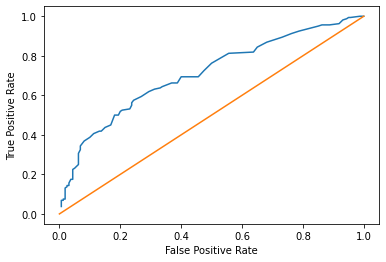

In [152]:
thresholds = np.arange(0.0, 2.0, 0.01)

FPR = []
TPR = []

for threshold in thresholds:
    selector = test[:,:,train_itr,:,0] > threshold

    accuracy = np.mean(selector, axis=(1,2))
    
    TPR += [np.mean(accuracy[3:5])]
    FPR += [np.mean(accuracy[0:2])]

print('validation_accuracy = ' + str(accuracy))
plt.plot(FPR, TPR)
plt.plot([0,1], [0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')